In [1]:
import pylcp
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants as const
from sympy.physics.wigner import wigner_3j, wigner_6j, wigner_9j
import time
import pathos
from sympy import Symbol
import numbers
gamma = 2*np.pi*84e6 # Hz
k = 2*np.pi/227.5e-9 # m^-1

t_unit = 1/gamma
#t_unit = 1e-1

m_unit = 1/k
#m_unit = 1e-9

velocity_unit = m_unit/t_unit
accel_unit = m_unit/t_unit**2
Hz_unit = 1/t_unit
Js_unit = const.hbar # kg m^2/s
mass_unit = Js_unit*t_unit/m_unit**2
HzperT_unit = const.value("Bohr magneton")/(Js_unit)
T_unit = Hz_unit/HzperT_unit
amu_unit = mass_unit/1.66e-27
cm_unit = m_unit/1e-2
F_unit = mass_unit*m_unit/t_unit**2
I_sat = (np.pi*const.h*const.c*gamma)/(3*227.5e-9**3) # W/m^2
print(t_unit)
print(cm_unit)
print(velocity_unit)
print(accel_unit)
ksim=k*m_unit
gammasim=gamma/Hz_unit
print(ksim)
print(gammasim)
# (F1, F) IAl = 5/2, IF = 1/2, F1 = J + IAl, F = F1 + IF
labels = [(3/2,1),(3/2,2),(5/2,2),(5/2,3),(7/2,3),(7/2,4)]
full_labels = np.concatenate([[(i[0], i[1], j) for j in np.arange(-i[1],i[1]+1,1)] for i in labels])
obe_kwargs = dict(itermax=10, rel=1e-6, abs=(1000*(46*1.66e-27)/(F_unit))**2, #deltat_func = lambda r, v : 1/gammasim+0*(1/gammasim if ksim/abs(v[0]) < 1/gammasim else 2*np.pi/ksim/abs(v[0])), deltat_r=np.inf,
                  deltat_tmax = 500/gammasim, deltat_v=250/ksim,
                  Npts=25001, debug = False, rtol=1e-4, reset_pos = False,
                  atol=np.concatenate(([1e-4]*72*72,[1/velocity_unit,1/velocity_unit,1/velocity_unit,1e-2/cm_unit,1e-2/cm_unit,1e-2/cm_unit])))

1.8947017034749446e-09
3.6207749553406186e-06
19.11
10086020382.496958
1.0
1.0000000000000002


In [2]:
import dill
with open("AlF_v0_-1_nomag.dump", 'rb') as file:
    obe = dill.load(file)

In [3]:
obe.laserBeams={
    'X(v=0)->A(v=0)' : pylcp.laserBeams([
        {'kvec':np.array([1,0, 0.])*ksim, 'pol':-1, 'delta':-gammasim/2, 's':0.3},
        {'kvec':np.array([-1,0, 0.])*ksim, 'pol':-1, 'delta':-gammasim/2, 's':0.3}
    ], beam_type=pylcp.infinitePlaneWaveBeam)}

c:\Users\LP618\Anaconda3\lib\site-packages\pylcp-1.0.2-py3.9.egg\pylcp\rateeq.py:264: ComplexWarning: Casting complex values to real discards the imaginary part


c:\Users\LP618\Anaconda3\lib\site-packages\pylcp-1.0.2-py3.9.egg\pylcp\rateeq.py:264: ComplexWarning: Casting complex values to real discards the imaginary part


Completed in 3:55:33.                                               


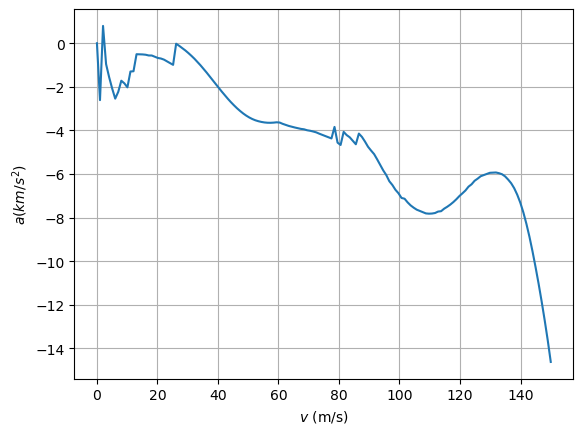

In [4]:
R = np.linspace(-10/cm_unit, 10/cm_unit, 100)
v = np.linspace(-0/velocity_unit, 150/velocity_unit, 150) 

obe.generate_force_profile([np.zeros(v.shape),np.zeros(v.shape),np.zeros(v.shape)],
                           [v/np.sqrt(2),     v/np.sqrt(2),     np.zeros(v.shape)],
                           name='Frad', progress_bar=True, **obe_kwargs)


fig, ax = plt.subplots(1, 1)

colormesh = ax.plot(v*velocity_unit, (obe.profile['Frad'].F[0])*F_unit*1e-3/(46*1.66e-27))
ax.set_xlabel('$v$ (m/s)')
ax.set_ylabel('$a(km/s^2)$')
ylim = ax.get_ylim()
ax.grid()
fig.subplots_adjust(left=0.12,right=0.9)